In [35]:
from neo.io import NeuroExplorerIO
import os
import neo
import elephant
import numpy as np
import pandas as pd
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from quantities import ms, s, Hz
from elephant.spike_train_generation import homogeneous_poisson_process, homogeneous_gamma_process
from elephant import neo_tools as nt
from viziphant.rasterplot import rasterplot
from viziphant.spade import plot_patterns
from viziphant.spade import plot_patterns_statistics
import seaborn as sns
import glob

%matplotlib inline

In [36]:
datadirectory = r'D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\analysis_01_HCx_GFP_B_aCSF_base\spade_output\results_kaggle_nsurr2000_0-60'
filedirectory = r'D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\analysis_01_HCx_GFP_B_aCSF_base'

In [37]:
tick = 40
scale_factor_for_second = 1e-06

In [38]:
os.chdir(filedirectory)

In [39]:
filelist = glob.glob('*.npy')

In [40]:
filelist

['01_HCx_GFP_B_aCSF_base_0_to_120_completerecording_full_spikedic.npy',
 '01_HCx_GFP_B_aCSF_base_burst_starts_dictionary.npy',
 '01_HCx_GFP_B_aCSF_base_burst_starts_dictionary_SPADE_0-180_binsize-5_winlen-20_dither-20_spectrum-3d#_statcor-fdr_bh.npy',
 '01_HCx_GFP_B_aCSF_base_burst_starts_dictionary_SPADE_binsize-5_winlen-20_dither-20_spectrum-3d#_statcor-fdr_bh.npy',
 '01_HCx_GFP_B_aCSF_base_whole_recording_burst_connections_dic.npy',
 'infodics_01_HCx_GFP_B_aCSF_base_0_to_120_completerecording.npy',
 'spiketrain_spade_190416_01_HCx_GFP_B_aCSF_20_40.npy']

In [41]:
namebase = filelist[0].split('SPADE')[0]

In [42]:
spadename = filelist[2]
spikename = filelist[1]

In [43]:
spade =  np.load(spadename,allow_pickle='TRUE').item()

In [44]:
reloadedspikedic = np.load(spikename, allow_pickle='TRUE').item()

In [45]:
def cut_reloaded_spikedic(spikedic, start=0, stop=180):

    cutted_dic = {}
    templist = []
    
    for key in spikedic:
        templist = []
        spikes = spikedic[key]
        for i in spikes:
            j = i*scale_factor_for_second # the ticks have already been applied in the burststarts
            if (j>=start) and (j<stop):
                templist.append(i)
        cutted_dic[key] = templist
        
    return cutted_dic
                

In [46]:
reloadedspikedic = cut_reloaded_spikedic(reloadedspikedic)

In [47]:
mea_array=np.empty((16,16,))
mea_array[:]=np.nan

In [48]:
mea_array

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, na

In [49]:
columnlist =['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','R']

In [50]:
df = pd.DataFrame(data=mea_array,columns=columnlist)

In [51]:
df.index+=1

In [52]:
df

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,R
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# SPADE RESULTS

In [53]:
len(spade['patterns'])

3

In [54]:
spade

{'pvalue_spectrum': [[3, 4, 3, 0.002], [3, 4, 4, 0.001]],
 'non_sgnf_sgnt': [(3.0, 4.0, 3.0), (3.0, 4.0, 4.0)],
 'patterns': [{'itemset': (40, 80, 540),
   'windows_ids': (13623, 14801, 19938, 20020, 26329),
   'neurons': [2, 4, 27],
   'lags': array([0., 0.]) * ms,
   'times': array([ 68115.,  74005.,  99690., 100100., 131645.]) * ms,
   'signature': (3, 5, 0),
   'pvalue': 0.0},
  {'itemset': (1580, 180, 120),
   'windows_ids': (7992, 12236, 13457, 14369, 30997, 33599),
   'neurons': [79, 9, 6],
   'lags': array([0., 0.]) * ms,
   'times': array([ 39960.,  61180.,  67285.,  71845., 154985., 167995.]) * ms,
   'signature': (3, 6, 0),
   'pvalue': 0.0},
  {'itemset': (160, 180, 120),
   'windows_ids': (3483, 6452, 9105, 15277, 19269, 21077),
   'neurons': [8, 9, 6],
   'lags': array([0., 0.]) * ms,
   'times': array([ 17415.,  32260.,  45525.,  76385.,  96345., 105385.]) * ms,
   'signature': (3, 6, 0),
   'pvalue': 0.0}]}

In [55]:
scale_factor_for_second = 1e-06
scale_factor_for_milisecond = 1e-03
tick=40

In [56]:
spikes = []

for key in reloadedspikedic:
    spikes.append(reloadedspikedic[key])
spikearray = np.sort(np.concatenate(spikes, axis = 0))
spikelist = list(spikearray)

spikearray_sec=spikearray*scale_factor_for_second
recordinglength = round(spikearray_sec[-1]) + 1

In [57]:
def spikedic_to_neospiketrains(spikedic, recordinglength):
    
    

    spiketrains = [] 
    keylist_spiketrains = []
    for key in reloadedspikedic:
        key_array=np.asarray(reloadedspikedic[key])
        key_array_sec=key_array*1e-06
        if len(key_array_sec)>2:
            st = neo.SpikeTrain(list(key_array_sec), units='sec', t_stop=recordinglength)
            spiketrains.append(st)
            keylist_spiketrains.append(key)
        
    return spiketrains, keylist_spiketrains

In [58]:
spiketrains, keylist_spiketrains = spikedic_to_neospiketrains(reloadedspikedic, recordinglength)

In [59]:
spiketrains

[SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,

(<Figure size 720x576 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Patterns statistics'}, xlabel='Neuronal participation in patterns', ylabel='Count'>,
        <AxesSubplot:xlabel='Pattern occurrences', ylabel='Count'>,
        <AxesSubplot:xlabel='Pattern size', ylabel='Count'>], dtype=object))

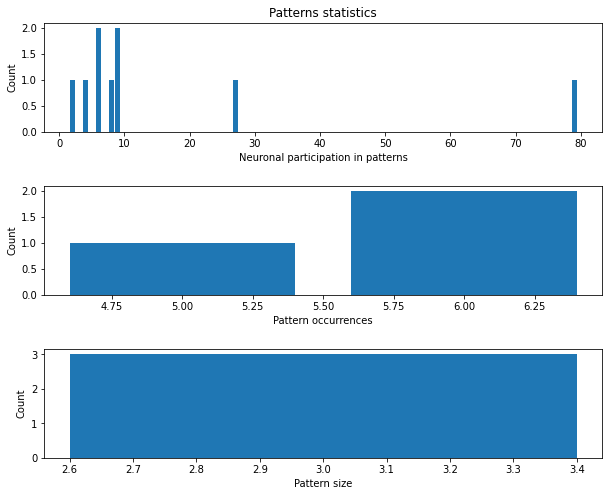

In [60]:
plot_patterns_statistics(spade['patterns'])

In [61]:
patterns = spade['patterns']

<AxesSubplot:xlabel='Time (s)', ylabel='Neuron'>

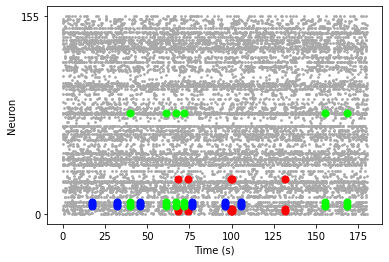

In [62]:
#fig, ax = plt.subplots(1,1, figsize = (10,10))

plot_patterns(spiketrains=spiketrains, patterns=patterns)


In [63]:
type(spikearray_sec)

numpy.ndarray

In [64]:
def make_pattern_dic(patterns):
    
    patterndic = {}
    for i in range(0, len(patterns)):
        key='P'+str(i)
        patterndic[key]=[(patterns[i]['neurons']),(patterns[i]['lags'])]
        
    
    return patterndic

In [65]:
patterndic = make_pattern_dic(patterns)

In [66]:
patterndic

{'P0': [[2, 4, 27], array([0., 0.]) * ms],
 'P1': [[79, 9, 6], array([0., 0.]) * ms],
 'P2': [[8, 9, 6], array([0., 0.]) * ms]}

In [67]:
def patterns_to_df(df, patterndic, key):
    
    patterncount= (len(patterndic[key][0]))+1
    for i in patterndic[key][0]:
        keystring=keylist_spiketrains[i]
        i, j = keystring[0], int(keystring[1:])
        df.loc[j,i]=patterncount
        df=df.fillna(0)
        patterncount-=1
        
    
    return df

# PATTERNS SPATIAL

<AxesSubplot:>

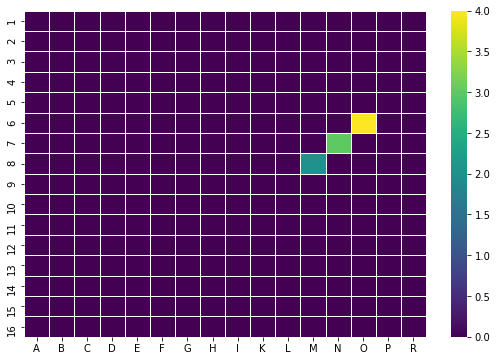

In [77]:
df4=df.copy()
df_Pattern4 = patterns_to_df(df4, patterndic, 'P2')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_Pattern4, annot=False, linewidths=.5, ax=ax, cmap='viridis')

In [69]:
patterndic

{'P0': [[2, 4, 27], array([0., 0.]) * ms],
 'P1': [[79, 9, 6], array([0., 0.]) * ms],
 'P2': [[8, 9, 6], array([0., 0.]) * ms]}

In [70]:
def get_channel_SPADE_participation(patterndic, keylist_spiketrains):
    
    '''
    Input: patterndic = Dic with keys=patternnumber, values=array of list, array[0]
            contains the participating channels of that pattern, array[1] contains the lags in between
            
    Output: a dictionary with key: channel names, e.g. A1, value: int given the number of appearances
            in any pattern 
    '''
    
    participation_dic={}
    for key in patterndic:
        for i in patterndic[key][0]:
            pd_key=keylist_spiketrains[i]
            if pd_key in participation_dic:
                participation_dic[pd_key]+=1
            else:
                participation_dic[pd_key]=1
    
    return participation_dic
        
        
    
    
    
    

In [71]:
pd_dic=get_channel_SPADE_participation(patterndic, keylist_spiketrains)

In [72]:
pd_dic

{'O10': 1, 'L9': 1, 'L8': 1, 'P16': 1, 'N7': 2, 'M8': 2, 'O6': 1}

In [73]:
participdic['A2']+=1

NameError: name 'participdic' is not defined

In [74]:
participdic

NameError: name 'participdic' is not defined

In [56]:
laglist = []

In [ ]:
for i in patterns:
    i['']

In [67]:
keylist_spiketrains[0]

'N8'

In [56]:
keylist_spiketrains[10]

'D3'

In [203]:
keylist_spiketrains.index('D7')

47

In [74]:
layer2_3list = ['A11', 'A12', 'A13', 'A14', 'A15', 'B12', 'B13', 'B14', 'B15', 'B16', 'C12', 'C13', 'C14', 'C15', 'C16', 'D13', 'D14', 'D15', 'D16', 'E13', 'E14', 'E15', 'E16', 'F13', 'F14', 'F15', 'F16', 'G13', 'G14', 'G15', 'G16', 'H13', 'H14', 'H15', 'H16', 'I13', 'I14', 'I15', 'I16', 'K13', 'K14', 'K15', 'K16', 'L13', 'L14', 'L15', 'L16', 'M13', 'M14', 'M15', 'M16', 'N13', 'N14', 'N15', 'N16', 'O13', 'O14', 'O15', 'O16', 'P12', 'P13', 'P14', 'P15', 'P16', 'R12', 'R13', 'R14', 'R15'] 

In [75]:
layer4_list = ['A10', 'B10', 'B11', 'C11', 'D11', 'D12', 'E11', 'E12', 'F11', 'F12', 'G11', 'G12', 'H11', 'H12', 'I11', 'I12', 'K11', 'K12', 'L11', 'L12', 'M11', 'M12', 'N11', 'O10', 'O11', 'P10', 'P11', 'R10', 'R11'] 

In [76]:
layer5_6list = ['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'O5', 'O6', 'O7', 'O8', 'O9', 'P5', 'P6', 'P7', 'P8', 'P9', 'R5', 'R6', 'R7', 'R8', 'R9']

In [77]:
white_matter_list = ['A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3', 'G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'I1', 'I2', 'I3', 'K1', 'K2', 'K3', 'L1', 'L2', 'L3', 'M1', 'M2', 'M3', 'M4', 'N1', 'N2', 'N3', 'N4', 'O1', 'O2', 'O3', 'O4', 'P1', 'P2', 'P3', 'P4', 'R2', 'R3', 'R4']

In [83]:
layer4_list.append('O12')

In [ ]:
columnlist =['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','R']

In [84]:
listdic ={} 

In [90]:
for i in white_matter_list:
    listdic[i]=9

In [167]:
def getlayer_firingrate(fireratedic, layerlist):
    
    sum_all = 0
    n=0
    std=0
    mean=0
    frlist = []
    for i in layerlist:
        sum_all +=fireratedic[i]
        frlist.append(fireratedic[i])
        n+=1
    mean = sum_all/n
    mean_nump=np.mean(frlist)
    std=np.std(frlist)
    
    return mean, mean_nump, std

In [180]:
mean, mean_nump, std = getlayer_firingrate(fireratedic, white_matter_list)

In [181]:
mean

1.0565978155038407

In [182]:
mean_nump

1.0565978155038405

In [183]:
std

2.1159404219949005